In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
electric_fuel_stations = pd.read_parquet('Data/Normalized/electric_alternative_fuel_stations.parquet')
Alter_vehicles = pd.read_parquet('Data/Normalized/alternative_fuel_vehicles.parquet')
taxi_zone = pd.read_parquet('Data/Normalized/taxi_zones.parquet')
vehicle_cons = pd.read_parquet('Data/Normalized/vehicle_consumption.parquet')

#### Electric and Alternative Fuel Charging Stations

El siguiente dataset contiene datos sobre las distintas estaciones de servicio en New York.

In [3]:
electric_fuel_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fuel Type Code  200 non-null    object 
 1   Station Name    200 non-null    object 
 2   Street Address  200 non-null    object 
 3   Borough         200 non-null    object 
 4   Latitude        200 non-null    float64
 5   Longitude       200 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.5+ KB


**Columnas**

- **Fuel Type Code**: Codigo de combustible de la estacion.
- **Station Name**: Nombre de la estacion de servicio.
- **Street Address**: Direccion de la estacion.
- **City**: Ciudad en la que esta la estacion.
- **State**: Estado.
- **ZIP**: Codigo postal.
- **Status Code**
- **Latitude**: Coordenada.
- **Longitude**: Coordenada.


In [4]:
print(f'El dataset contiene {electric_fuel_stations.shape[0]} Filas y {electric_fuel_stations.shape[1]} Columnas')

El dataset contiene 200 Filas y 6 Columnas


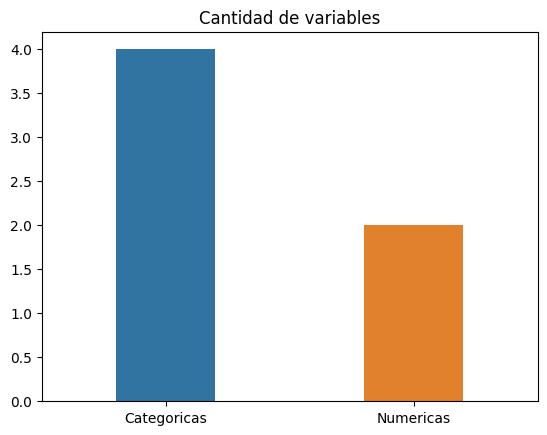

In [5]:
col_categoricas = len(electric_fuel_stations.select_dtypes(include=['object']).columns)
col_numericas = len(electric_fuel_stations.select_dtypes(exclude='object').columns)

sns.barplot(x=['Categoricas','Numericas'] ,y=[col_categoricas,col_numericas],
            hue=['Categoricas','Numericas'], width=0.4)
plt.title('Cantidad de variables')
plt.show()


In [6]:
def data_characteristics(df):
    list = []
    for columna in df.columns:
        cant_nulos = df[columna].isnull().sum()
        tipo_dato = df[columna].dtypes
        porcen_null = round((cant_nulos / len(df))* 100)
    
        list.append({'Columna':columna,
                     'Tipo de dato':tipo_dato,
                     'Cantidad nulos':cant_nulos,
                     'Porcentaje':f'{porcen_null}%'})
        
    return pd.DataFrame(list)

data_characteristics(electric_fuel_stations)

,Columna,Tipo de dato,Cantidad nulos,Porcentaje
0,Fuel Type Code,object,0,0%
1,Station Name,object,0,0%
2,Street Address,object,0,0%
3,Borough,object,0,0%
4,Latitude,float64,0,0%
5,Longitude,float64,0,0%


In [7]:
print(f'Filas Duplicadas:{electric_fuel_stations.duplicated().sum()}')

Filas Duplicadas:2


In [8]:
electric_fuel_stations.head()

,Fuel Type Code,Station Name,Street Address,Borough,Latitude,Longitude
0,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,40.718037,-73.932309
1,CNG,Canarsie - National Grid,8424 Ditmas Ave,Brooklyn,40.645540,-73.918344
2,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,40.844188,-73.861572
3,CNG,Con Edison - College Point Service Center,124-15 31st Ave,Queens,40.769623,-73.843069
4,CNG,Bronx Zoo,2300 Southern Blvd,Bronx,40.850018,-73.878128


In [9]:
#Funcion para agregar etiqueta de magnitud a graficos de barras
def ubication_label(grafico):
  for p in grafico.patches:    
    height = p.get_height() # Obtiene la altura (frecuencia) de la barra
    pos_inicial_bar = p.get_x()
    ancho_barra = p.get_width() / 2
    
    x_pos = pos_inicial_bar + ancho_barra #Posicion donde se coloca la etiqueta
    y_pos = height # Ajuste de la posición vertical
    
    height = int(height)
        # Agrega la etiqueta 
    grafico.annotate(f'{height}', (x_pos, y_pos), ha='center', va='bottom')

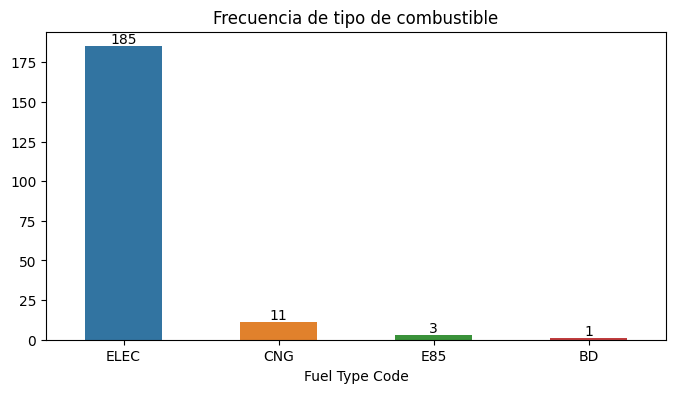

In [10]:
#Obtengo la cantidad de veces que aparece cada uno
tipo_combustible = electric_fuel_stations['Fuel Type Code'].value_counts()

plt.figure(figsize=(8,4))
graphic = sns.barplot(x=tipo_combustible.index, y=tipo_combustible.values,
            hue=tipo_combustible.index, width=0.5)
ubication_label(graphic)
plt.title('Frecuencia de tipo de combustible')
plt.show()

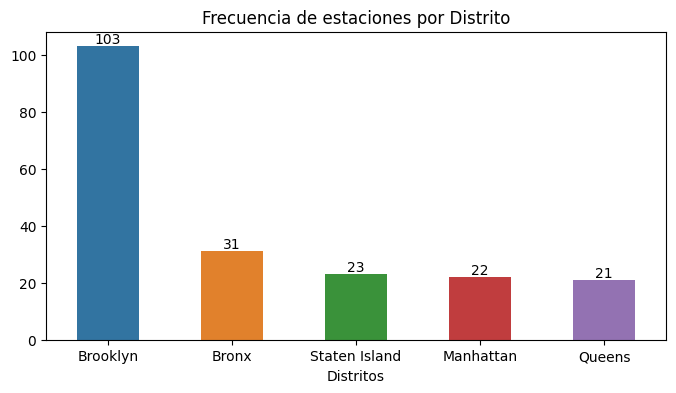

In [11]:
stationsxciudad = electric_fuel_stations['Borough'].value_counts()

plt.figure(figsize=(8,4))
graphic = sns.barplot(x=stationsxciudad.index,y=stationsxciudad.values,
            hue=stationsxciudad.index, width=0.5)
ubication_label(graphic)
plt.title('Frecuencia de estaciones por Distrito')
plt.xlabel('Distritos')
plt.show()


**Observaciones**: La mayoria de las estaciones de servicio se encuentran en el distrito Brooklyn

In [12]:
xciudad = electric_fuel_stations.groupby(['Borough', 'Fuel Type Code']).size().reset_index(name='Count')
xciudad

,Borough,Fuel Type Code,Count
0,Bronx,CNG,6
1,Bronx,ELEC,25
2,Brooklyn,CNG,4
3,Brooklyn,E85,1
4,Brooklyn,ELEC,98
5,Manhattan,ELEC,22
6,Queens,CNG,1
7,Queens,E85,1
8,Queens,ELEC,19
9,Staten Island,BD,1


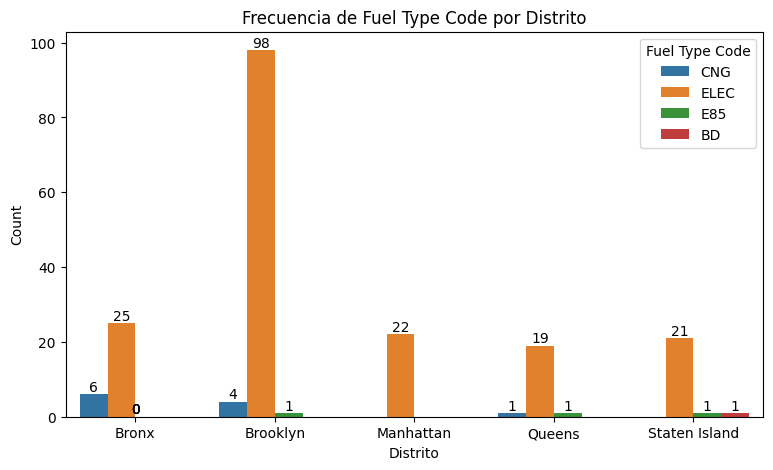

In [13]:
plt.figure(figsize=(9,5))
graphic = sns.barplot(data=xciudad, x='Borough', y='Count', hue='Fuel Type Code')
ubication_label(graphic)
plt.title('Frecuencia de Fuel Type Code por Distrito')
plt.xlabel('Distrito')
plt.show()

------------------

#### Alternative Fuel Vehicles US

El siguiente dataset contiene diferentes modelos de vehiculos que utilizan combustible alternativo.

In [14]:
Alter_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Model         528 non-null    object 
 1   Model Year    518 non-null    float64
 2   Manufacturer  528 non-null    object 
 3   Category      528 non-null    object 
 4   Fuel          528 non-null    object 
 5   Consumption   514 non-null    float64
dtypes: float64(2), object(4)
memory usage: 24.9+ KB


**Columnas**

- **Category**: Contiene el tipo de vehiculo.
- **Model**: Modelo del vehiculo.
- **Manufacturer**: Fabricante del vehiculo.
- **Fuel**: Combustible del vehiculo.
- **Miles per Gallon City**: Cantidad de millas recorridas por tanque (en caso de no ser electrico).
- **Transmission Type**: Tipo de trasmicion del vehiculo (Manual/Automatico)


In [15]:
data_characteristics(Alter_vehicles)

,Columna,Tipo de dato,Cantidad nulos,Porcentaje
0,Model,object,0,0%
1,Model Year,float64,10,2%
2,Manufacturer,object,0,0%
3,Category,object,0,0%
4,Fuel,object,0,0%
5,Consumption,float64,14,3%


In [16]:
print(f'Filas duplicadas {Alter_vehicles.duplicated().sum()}')

Filas duplicadas 2


In [17]:
Alter_vehicles['Fuel'].unique()

array(['Hybrid Electric', 'Plug-in Hybrid Electric', 'Electric',
       'Biodiesel (B20)', 'Ethanol (E85)', 'Hydrogen Fuel Cell',
       'Propane - Bi-fuel', 'CNG - Compressed Natural Gas',
       'CNG - Bi-fuel', 'Propane'], dtype=object)

Para el analisis estadistico se decidio filtrar el dataset excluyendo las filas donde 'Fuel' es Electric, esto debido a que las filas de los vehiculos electricos contienen el valor 0 en la columna 'Miles per Gallon City'. 

In [18]:
filtrado = Alter_vehicles.loc[Alter_vehicles['Fuel']!='Electric']
filtrado.describe()
#Alter_vehicles['Fuel']!='Electric'.describe()

,Model Year,Consumption
count,393.000000,389.000000
mean,2021.508906,27.994859
std,0.500558,12.934011
min,2021.000000,11.000000
25%,2021.000000,20.000000
50%,2022.000000,23.000000
75%,2022.000000,35.000000
max,2022.000000,76.000000


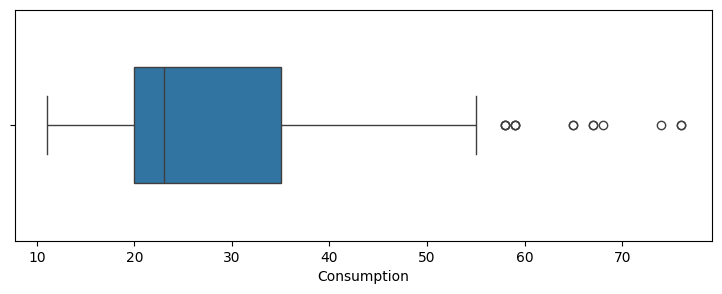

In [19]:
plt.figure(figsize=(9,3))
sns.boxplot(data=filtrado, x='Consumption',width=0.5)
plt.show()

**Observaciones**: El 50% de los vehiculos recorren entre 20 y 35 millas por galeon. El promedio es de 27 millas. Se observan valores atipicos mayores a 40.

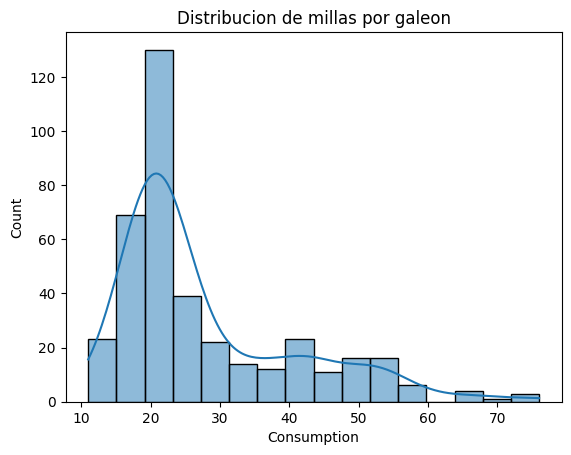

In [20]:
sns.histplot(data=filtrado,x='Consumption',kde=True)
plt.title('Distribucion de millas por galeon')

plt.show()

**Observaciones**: Distribucion sesgada a la derecha. La mayoria de vehiculos recorren al rededor de 22 millas.

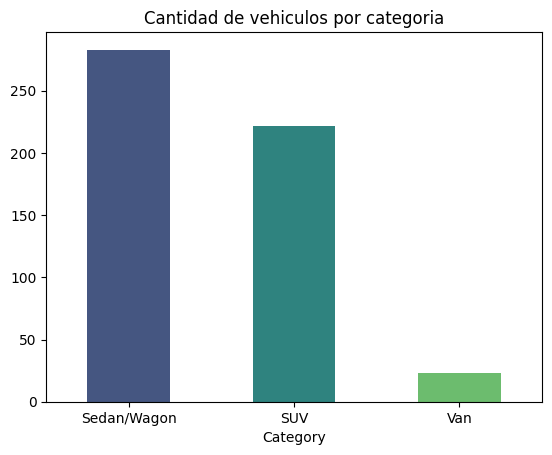

In [21]:
categoria = Alter_vehicles['Category'].value_counts()

sns.barplot(x=categoria.index, y= categoria.values, hue=categoria.index, 
            width=0.5,palette='viridis')
plt.title('Cantidad de vehiculos por categoria')
plt.show()

**Observaciones**: El tipo de vehiculo 'Sedan/Wagon' es el mas utilizado por los taxistas.

In [22]:
print('TOP 5 Fabricantes por categoria de taxi')
#Agrupa por categoria, luego por manufacturer, cuenta la cantidad de cada manufacturer y trae 
# los 5 con mayor cantidad de cada categoria. (x representa cada grupo del .groupby('Category'))
print(Alter_vehicles.groupby('Category').apply(lambda x: x.groupby('Manufacturer').size().nlargest(5)))

TOP 5 Fabricantes por categoria de taxi
Category     Manufacturer 
SUV          Land Rover       26
             Audi             21
             BMW              21
             Mercedes-Benz    21
             Ford             18
Sedan/Wagon  Audi             44
             Mercedes-Benz    37
             BMW              29
             Porsche          28
             Toyota           25
Van          Ford             12
             Toyota            3
             Chevrolet         2
             Chrysler          2
             GMC               2
dtype: int64


In [23]:
type_fuel = Alter_vehicles['Fuel'].value_counts().nlargest(5)
type_fuel

Fuel
Hybrid Electric            259
Electric                   129
Plug-in Hybrid Electric     93
Biodiesel (B20)             24
Hydrogen Fuel Cell          10
Name: count, dtype: int64

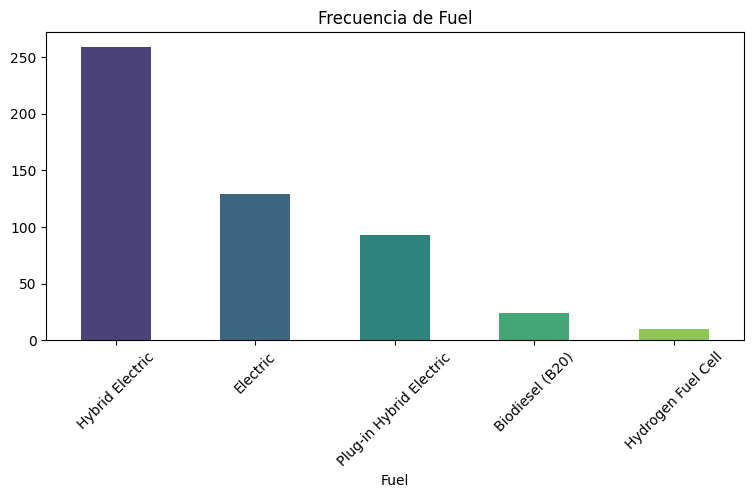

In [24]:
plt.figure(figsize=(9,4))
sns.barplot(x=type_fuel.index, y=type_fuel.values,hue=type_fuel.index,width=0.5,palette='viridis')
plt.title('Frecuencia de Fuel')
plt.xticks(rotation=45)
plt.show()

**Observaciones** Los vehiculos hibridos son los mas utilizados.

In [25]:
Alter_vehicles['Fuel']=Alter_vehicles['Fuel'].replace('CNG - Compressed Natural Gas','CNG')

In [26]:
filtrado = Alter_vehicles[~Alter_vehicles['Fuel'].isin(['CNG - Bi-fuel', 'Propane','CNG','Propane - Bi-fuel'])]

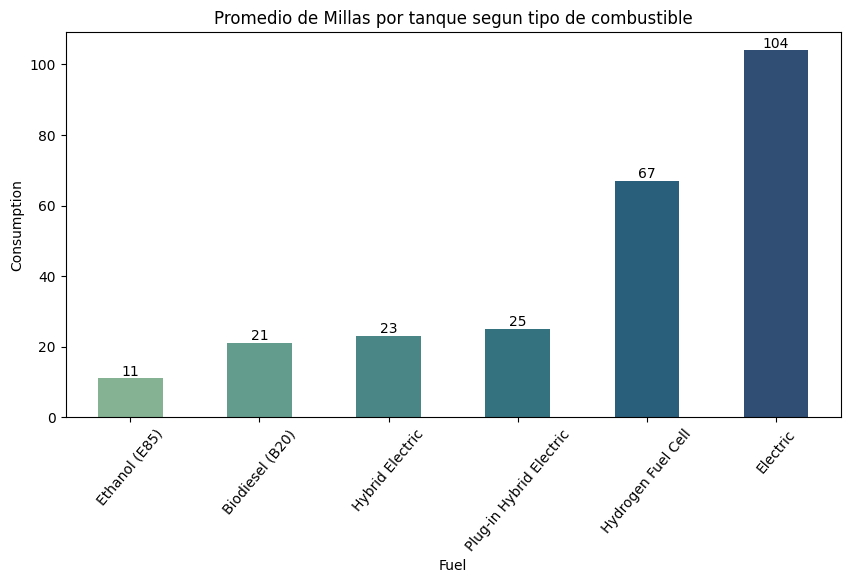

In [27]:
asd = round(filtrado.groupby('Fuel')['Consumption'].median()).sort_values().reset_index()
plt.figure(figsize=(10,5))

graphic = sns.barplot(x='Fuel', y='Consumption', data=asd, 
            hue='Fuel',palette='crest',width=0.5)
ubication_label(graphic)
plt.title('Promedio de Millas por tanque segun tipo de combustible')
plt.xticks(rotation=50)
plt.show()

#sns.barplot(x='Fuel', y='Miles per Gallon City', data=Alter_vehicles)

--------------------------

#### taxi_zones

In [28]:
taxi_zone.head()

,Zone,LocationID,Borough
0,Newark Airport,1,EWR
1,Jamaica Bay,2,Queens
2,Allerton/Pelham Gardens,3,Bronx
3,Alphabet City,4,Manhattan
4,Arden Heights,5,Staten Island


**Columnas**
- **Zone**: Zona del servicio.
- **LocationID**: Id de la zona del servicio
- **Borough**: Distrito del taxi (creo)

In [29]:
data_characteristics(taxi_zone)

,Columna,Tipo de dato,Cantidad nulos,Porcentaje
0,Zone,object,0,0%
1,LocationID,int64,0,0%
2,Borough,object,0,0%


In [30]:
print('Cantidad de duplicados',taxi_zone.duplicated().sum())

Cantidad de duplicados 0


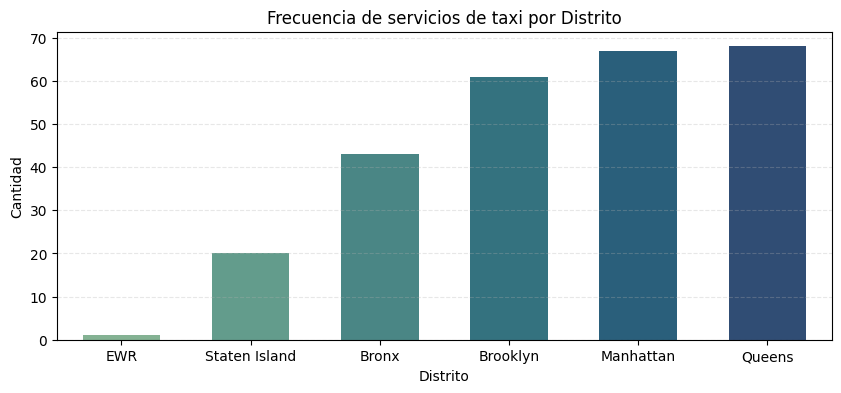

In [31]:
distritos = taxi_zone['Borough'].value_counts().sort_values()
plt.figure(figsize=(10,4))

sns.barplot(x=distritos.index, y=distritos.values,
            hue=distritos.index ,palette='crest',width=0.6)

plt.grid(visible=True,
         axis='y', linestyle='--',alpha=0.3)
plt.title('Frecuencia de servicios de taxi por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.show()


**Observaciones**: Los distritos con mas zonas de servicio son Quenns y Manhattan.

In [32]:
taxi_zone['Zone'].unique()

array(['Newark Airport', 'Jamaica Bay', 'Allerton/Pelham Gardens',
       'Alphabet City', 'Arden Heights', 'Arrochar/Fort Wadsworth',
       'Astoria', 'Astoria Park', 'Auburndale', 'Baisley Park',
       'Bath Beach', 'Battery Park', 'Battery Park City', 'Bay Ridge',
       'Bay Terrace/Fort Totten', 'Bayside', 'Bedford', 'Bedford Park',
       'Bellerose', 'Belmont', 'Bensonhurst East', 'Bensonhurst West',
       'Bloomfield/Emerson Hill', 'Bloomingdale', 'Boerum Hill',
       'Borough Park', 'Breezy Point/Fort Tilden/Riis Beach',
       'Briarwood/Jamaica Hills', 'Brighton Beach', 'Broad Channel',
       'Bronx Park', 'Bronxdale', 'Brooklyn Heights',
       'Brooklyn Navy Yard', 'Brownsville', 'Bushwick North',
       'Bushwick South', 'Cambria Heights', 'Canarsie', 'Carroll Gardens',
       'Central Harlem', 'Central Harlem North', 'Central Park',
       'Charleston/Tottenville', 'Chinatown', 'City Island',
       'Claremont/Bathgate', 'Clinton East', 'Clinton Hill',
       'Clint

---------------------------------

#### vehicle_consumption

In [33]:
vehicle_cons.sample(5)

,Model year,Make,Model,Vehicle class,Fuel type,Consumption,CO2 emissions (g/km),CO2 rating,Smog rating
686,2022,Mercedes-Benz,EQB 350 4MATIC SUV,Sport utility vehicle: Small,Electric,21.1,0,10.0,10.0
582,2019,Tesla,Model X Standard Range,Sport utility vehicle: Standard,Electric,20.0,0,10.0,10.0
458,2023,Mitsubishi,Mirage,Compact,Gasoline,7.1,151,7.0,5.0
556,2023,Volvo,XC60 B6 AWD,Sport utility vehicle: Small,Gasoline,11.1,233,5.0,7.0
986,2024,Tesla,Model Y Performance,Sport utility vehicle: Small,Electric,18.3,0,10.0,10.0


**Columnas**

- **Model year**: Contiene el año de lanzamiento del vehiculo.
- **Make**: Fabricante del vehiculo.
- **Model**: Modelo del vehiculo.
- **Vehicle class**: Tamaño del vehiculo.
- **Fuel type**: Tipo de combustible.
- **Consumption**: Consumo por tanque.
- **CO2 emissions (g/km)**: Emision CO2 en gramos por km.
- **CO2 rating**: Índice de CO2.
- **Smog rating**: Nivel de contaminacion.

In [34]:
data_characteristics(vehicle_cons)

,Columna,Tipo de dato,Cantidad nulos,Porcentaje
0,Model year,int64,0,0%
1,Make,object,0,0%
2,Model,object,0,0%
3,Vehicle class,object,0,0%
4,Fuel type,object,0,0%
5,Consumption,float64,0,0%
6,CO2 emissions (g/km),int64,0,0%
7,CO2 rating,float64,0,0%
8,Smog rating,float64,0,0%


In [35]:
print(f'Cantidad de filas: {vehicle_cons.shape[0]} y columnas: {vehicle_cons.shape[1]}')
print(f'Cantidad de duplicados {vehicle_cons.duplicated().sum()}')

Cantidad de filas: 1004 y columnas: 9
Cantidad de duplicados 2


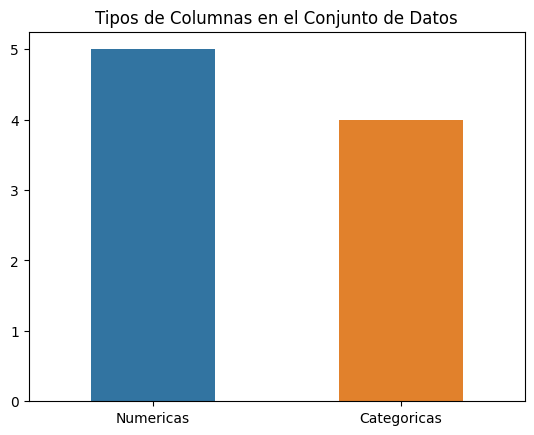

In [36]:
numeric_features = len(vehicle_cons.select_dtypes(exclude='object').columns)
categorical_features = len(vehicle_cons.select_dtypes(include='object').columns)

sns.barplot(x=['Numericas','Categoricas'],y=[numeric_features,categorical_features],
            hue=['Numericas','Categoricas'],width=0.5)
plt.title('Tipos de Columnas en el Conjunto de Datos')
plt.show()

In [37]:
vehicle_cons.describe()

,Model year,Consumption,CO2 emissions (g/km),CO2 rating,Smog rating
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2022.812749,16.283964,138.052789,7.050797,7.405378
std,1.037097,6.422064,131.737693,2.804428,2.630447
min,2019.000000,4.400000,0.000000,1.000000,1.000000
25%,2023.000000,11.075000,0.000000,5.000000,5.000000
50%,2023.000000,15.600000,175.500000,6.000000,7.000000
75%,2023.000000,20.400000,251.000000,10.000000,10.000000
max,2024.000000,43.800000,508.000000,10.000000,10.000000


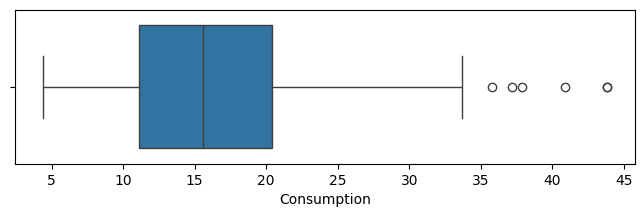

In [38]:
plt.figure(figsize=(8,2))
sns.boxplot(data=vehicle_cons,x='Consumption')
plt.show()

**Observaciones**: El 50% de los vehiculos recorren de entre 11 y 20,5 millas. Se observan pocos valores atipicos.

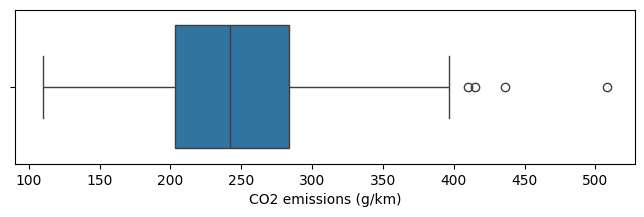

In [39]:
filtrado = vehicle_cons.loc[vehicle_cons['Fuel type']!='Electric']
plt.figure(figsize=(8,2))
sns.boxplot(data=filtrado,x='CO2 emissions (g/km)')
plt.show()

Hacemos un filtrado de datos, para omitir los vehiculos electricos ya que estos no generan CO2 y al tenerlos en el analisis pueden sesgar los datos.

Se puede observar que el 50% de los vehiculos emiten entre 203 y 284 gramos de CO2 por kilometro.

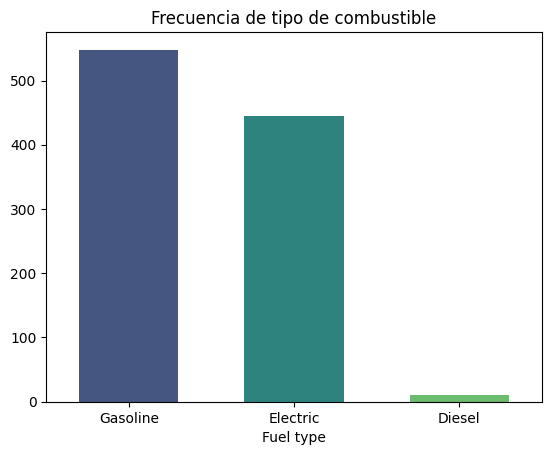

In [40]:
#Cantidad de vehiculos por tipo de combustible
Fuel_type = vehicle_cons.groupby('Fuel type')['Make'].count().sort_values(ascending=False)
sns.barplot(x=Fuel_type.index,y=Fuel_type.values, hue=Fuel_type.index,
            palette='viridis',width=0.6)
plt.title('Frecuencia de tipo de combustible')
plt.show()

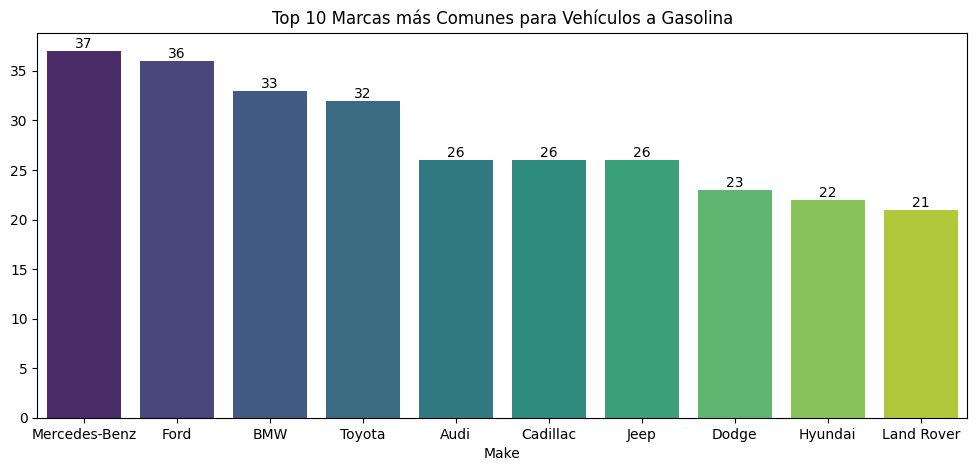

In [41]:
gasolina = vehicle_cons[vehicle_cons['Fuel type'] != 'Electric']
marcas = gasolina.groupby('Make').size().nlargest(10)

plt.figure(figsize=(12,5))
graphic=sns.barplot( x=marcas.index, y=marcas.values,hue=marcas.index,palette='viridis')
ubication_label(graphic)
plt.title('Top 10 Marcas más Comunes para Vehículos a Gasolina')
plt.show()

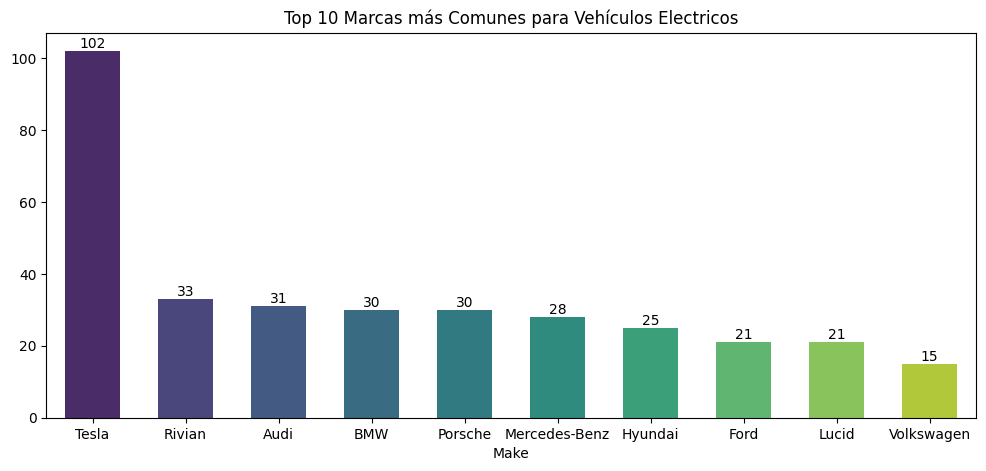

In [42]:
electricos = vehicle_cons[vehicle_cons['Fuel type'] == 'Electric']
marcas = electricos.groupby('Make').size().nlargest(10)

plt.figure(figsize=(12,5))
graphic=sns.barplot( x=marcas.index, y=marcas.values,hue=marcas.index,palette='viridis',width=0.6)
ubication_label(graphic)
plt.title('Top 10 Marcas más Comunes para Vehículos Electricos')
plt.show()